In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 

In [3]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -------------- ------------------------- 112.6/301.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 3.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from wordcloud import WordCloud

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\skcha\appdata\local\programs\python\python312\lib\site-packages (2.0.3)




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from xgboost import XGBClassifier

In [24]:
df = pd.read_csv("spam1.csv")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [27]:
df.shape

(5572, 5)

In [28]:
df['spam'] = df['v1'].apply(lambda x: 0 if x == "ham" else 1)
df = df.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
df.isnull().sum()


v2      0
spam    0
dtype: int64

In [30]:
df.describe(include=object).T

,count,unique,top,freq
v2,5572,5169,"Sorry, I'll call later",30


In [31]:
df.duplicated().sum()

403

In [32]:
df.drop_duplicates(keep='first',inplace=True)

### Visualization

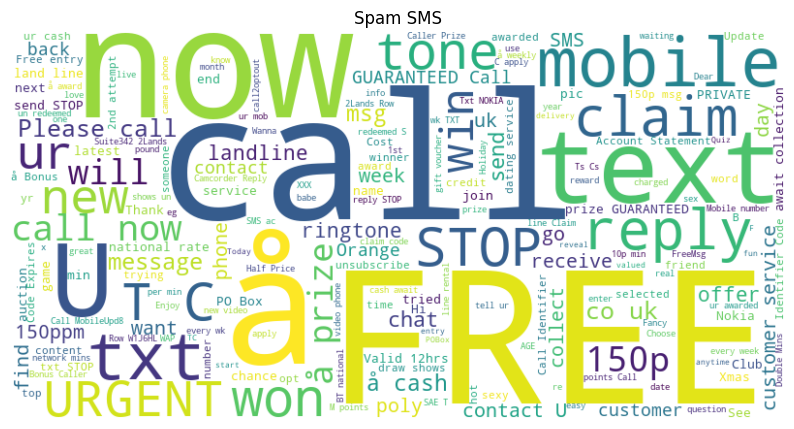

In [33]:
spam_df = df[df['spam'] == 1]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS')
plt.show()

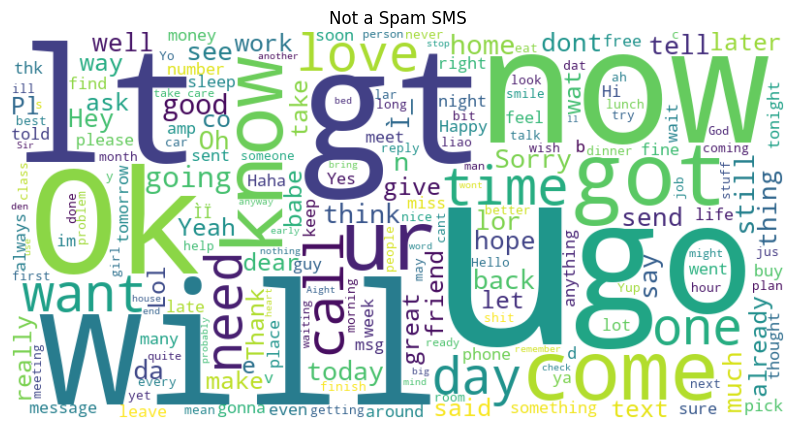

In [34]:
spam_df = df[df['spam'] == 0]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not a Spam SMS')
plt.show()

In [36]:
X , y = df['v2'] ,df['spam']

### Data Split

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [38]:
print(len(X_train))
print(len(X_test))

4135
1034


### Feature Extraction

In [39]:
vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

### Linear Support Vector Classifier (LinearSVC)

In [40]:
clf = LinearSVC()
clf.fit(X_train_vertorized,y_train)

C:\Users\skcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [41]:
y_pred = clf.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9825918762088974

confusion matrix: 
[[887   2]
 [ 16 129]]

precision score:  0.9847328244274809


In [42]:
data_frame = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
data_frame

,actual,predicted
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
...,...,...
4146,0,0
1208,0,0
4795,1,1
3575,0,0


Text(0.5, 1.0, 'Model Performance')

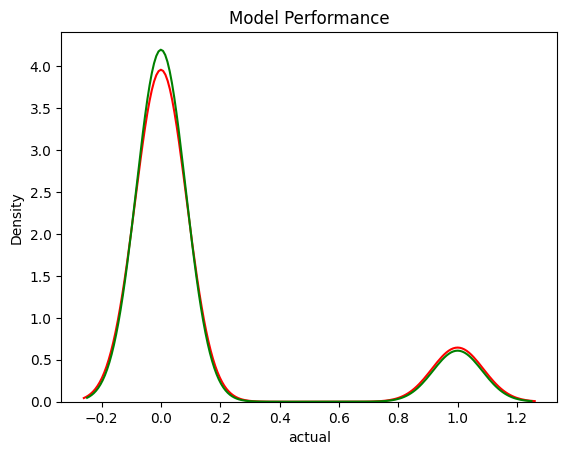

In [43]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

### Other Models

In [44]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_vertorized,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [45]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train_vertorized,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [46]:
y_pred2 = rfc.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9729206963249516

confusion matrix: 
[[889   0]
 [ 28 117]]

precision score:  1.0


In [47]:
y_pred1 = xgb.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.971953578336557

confusion matrix: 
[[887   2]
 [ 27 118]]

precision score:  0.9833333333333333


### Model Testing

In [48]:
with open("mytext.txt","w") as fl:
    fl.write(X_test.iloc[2])
with open("mytext.txt","r") as fl:
    text = fl.read()

text

'Ok...'

In [49]:
vector_text = vectorizer.transform([text])
clf.predict(vector_text)

array([0], dtype=int64)

In [50]:
y_test.iloc[2]

0

### Conclusion